In [11]:
import ast
import numpy as np
import womg
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from womg.__main__ import womg_main

In [5]:
g = nx.random_geometric_graph(100, .3)
docs_path = '../womg/womgdata/docs/demo_corpus/'
womg_main(graph=g, int_mode='nmf', homophily=1., virality_resistance=13, virality_exp=8., 
          infl_strength=12., gn_strength=13,
          docs_path=docs_path, save_int=True, seed=42, single_activator=False)

100%|██████████| 100/100 [00:00<00:00, 121362.96it/s]

Formatting graph:
Setting god node
Doing nmf with random coeff  0.125  and homophily  1.0


Macroscopic homophily level:  6.1617711228952725  with H= 1.0
/Users/Cinus/miniconda3/envs/womg-test/lib/python3.7/site-packages/womgdata/docs/training_corpus2

 In fit method there are  None docs, in ../womg/womgdata/docs/demo_corpus/  with description  None
None ../womg/womgdata/docs/demo_corpus/ None
Extracting topic distribution from docs in  ../womg/womgdata/docs/demo_corpus


100%|██████████| 2/2 [00:00<00:00, 363.05it/s]

Items' distribution over topics is stored
8.0
single_activator: False
z_sum:  13.662728719533568   virality:  13.411426301706122
z_sum:  14.346097631514652   virality:  13.411426301706122
z_sum:  13.482348329321221   virality:  13.411426301706122
z_sum:  13.139328468267037   virality:  13.411426301706122
z_sum:  14.140140075314447   virality:  13.411426301706122
z_sum:  14.341172473961183   virality:  13.411426301706122
z_sum:  13.083625042699168   virality:  13.411426301706122
z_sum:  13.617421716764802   virality:  13.411426301706122
z_sum:  14.170604762043352   virality:  13.411426301706122
z_sum:  13.106672817381199   virality:  13.411426301706122
z_sum:  13.349687559915026   virality:  13.411426301706122
z_sum:  14.24480920881142   virality:  13.411426301706122
z_sum:  13.259795233691671   virality:  13.411426301706122
z_sum:  13.284181219618937   virality:  13.411426301706122
z_sum:  13.509656823524242   virality:  13.411426301706122
z_sum:  13.31745754897698   virality:  13.4114

In [6]:
!ls ../Output/

Items_descript0.txt  Propagations1.txt    Topics_descript2.txt
Items_descript1.txt  Propagations2.txt    Users_interests0.txt
Items_descript2.txt  Topics_descript0.txt Users_interests1.txt
Propagations0.txt    Topics_descript1.txt Users_interests2.txt


In [7]:
df = pd.read_csv('../Output/Propagations2.txt', names=['time', 'item', 'node'], sep=' ')
print(df[df.item==0].node.count(), df[df.item==1].node.count())
print(df[(df.item==0)&(df.time==0)].node.count(), df[(df.item==1)&(df.time==0)].node.count())

80 61
71 28


NameError: name 'decomposition' is not defined

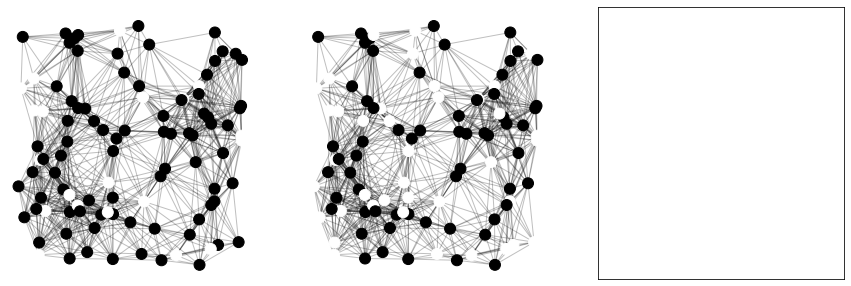

In [12]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

for ax, item in [(axs[0], 0), (axs[1], 1), (axs[2], None)]:
    # color_map
    color_map = []
    for node in g:
        if node in df[df.item==item].node.values:
            color_map.append('black')
        else: 
            color_map.append('white')


    pos=nx.get_node_attributes(g,'pos')

    # find node near center (0.5,0.5)
    dmin=1
    ncenter=0
    for n in pos:
        x,y=pos[n]
        d=(x-0.5)**2+(y-0.5)**2
        if d<dmin:
            ncenter=n
            dmin=d
            
    # gradient based on 1-dimensional interests projection
    if item==None:
        X = []
        df_interests = pd.read_csv('../Output/Users_interests2.txt', names=['interest'], sep=';')
        for node, interest in df_interests.iterrows():
            X.append(ast.literal_eval(interest[0]))
        X = np.array(X)
        pca = decomposition.PCA(n_components=1)
        pca.fit(X)
        X = pca.transform(X)
        color_map = [x[0] for x in X]
        minimum = min(color_map)
        color_map = [x+minimum for x in color_map]
    
    # color by path length from node near center
    p=nx.single_source_shortest_path_length(g,ncenter)

    nx.draw_networkx_edges(g,pos,nodelist=[ncenter],alpha=0.25, ax=ax)
    nx.draw_networkx_nodes(g,pos,nodelist=p.keys(),
                           node_size=120,
                           node_color=color_map,
                           cmap=plt.cm.Reds_r, ax=ax)

    ax.set_xlim(-0.05,1.05)
    ax.set_ylim(-0.05,1.05)
    ax.axis('off')

    #nx.draw(g, node_color=color_map, with_labels=True, ax=ax)

plt.show()

In [478]:
! rm -r ../Output/

In [404]:
! rm -r ../Output/

rm: ../Output/: No such file or directory
